In [1]:
import pandas as pd
# Dependencies and Setup
import matplotlib.pyplot as plt
from citipy import citipy 
import csv
%matplotlib inline
from collections.abc import Iterable

In [2]:
# Read Meteorite_Landings.csv file
meteorite_landings_df = pd.read_csv('Data_Files/Meteorite_Landings.csv')
meteorite_landings_df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [3]:
meteorite_landings_df['year'].head()

0    1880.0
1    1951.0
2    1952.0
3    1976.0
4    1902.0
Name: year, dtype: float64

In [4]:
#df['A'].isna().any() returns True if there are any NaN values in column 'A', and False otherwise.
meteorite_landings_df['year'].isna().any()

True

In [5]:
# Count NaN values in column 'year'
nan_count_A = meteorite_landings_df['year'].isna().sum()

print(f"Number of NaN values in column 'year': {nan_count_A}")

Number of NaN values in column 'year': 291


In [6]:
# Sort the dataset with Year
sort_meteorite_landings_df = meteorite_landings_df.sort_values(["year"], ascending=True)
sort_meteorite_landings_df 

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
704,Nogata,16988,Valid,L6,472.0,Fell,860.0,33.72500,130.75000,"(33.725, 130.75)"
679,Narni,16914,Valid,Stone-uncl,NaN,Fell,920.0,42.51667,12.51667,"(42.51667, 12.51667)"
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399.0,50.18333,12.73333,"(50.18333, 12.73333)"
856,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,1490.0,45.48333,9.51667,"(45.48333, 9.51667)"
283,Ensisheim,10039,Valid,LL6,127000.0,Fell,1491.0,47.86667,7.35000,"(47.86667, 7.35)"
...,...,...,...,...,...,...,...,...,...,...
38207,Valencia,24147,Valid,H5,33500.0,Found,NaN,39.00000,-0.03333,"(39.0, -0.03333)"
38231,Villa Regina,53827,Valid,"Iron, IIIAB",5030.0,Found,NaN,-39.10000,-67.06667,"(-39.1, -67.06667)"
38308,Wietrzno-Bobrka,24259,Valid,Iron,376.0,Found,NaN,49.41667,21.70000,"(49.41667, 21.7)"
38335,Wiltshire,56143,Valid,H5,92750.0,Found,NaN,51.14967,-1.81000,"(51.14967, -1.81)"


In [7]:
table_df = sort_meteorite_landings_df[["name", "year"]]
table_df.head(10)

,name,year
704,Nogata,860.0
679,Narni,920.0
278,Elbogen,1399.0
856,Rivolta de Bassi,1490.0
283,Ensisheim,1491.0
1043,Valdinoce,1495.0
730,Oliva-Gandia,1519.0
5365,Campo del Cielo,1575.0
174,Castrovillari,1583.0
26174,Morito,1600.0


In [8]:
# Change Year datatypes to integer
sort_meteorite_landings_df["year"] = pd.to_numeric(sort_meteorite_landings_df["year"])

In [9]:
clean_meteorite_landings_df = sort_meteorite_landings_df.dropna(how="any")
clean_meteorite_landings_df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
704,Nogata,16988,Valid,L6,472.0,Fell,860.0,33.72500,130.75000,"(33.725, 130.75)"
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399.0,50.18333,12.73333,"(50.18333, 12.73333)"
856,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,1490.0,45.48333,9.51667,"(45.48333, 9.51667)"
283,Ensisheim,10039,Valid,LL6,127000.0,Fell,1491.0,47.86667,7.35000,"(47.86667, 7.35)"
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575.0,-27.46667,-60.58333,"(-27.46667, -60.58333)"
...,...,...,...,...,...,...,...,...,...,...
30775,Northwest Africa 7856,57421,Valid,LL6,517.0,Found,2013.0,0.00000,0.00000,"(0.0, 0.0)"
30774,Northwest Africa 7855,57420,Valid,H4,916.0,Found,2013.0,0.00000,0.00000,"(0.0, 0.0)"
30762,Northwest Africa 7812,57258,Valid,Angrite,46.2,Found,2013.0,0.00000,0.00000,"(0.0, 0.0)"
30730,Northwest Africa 7755,57166,Valid,Martian (shergottite),30.0,Found,2013.0,0.00000,0.00000,"(0.0, 0.0)"


In [10]:
# Delete 0 geocodes from the dataframe
clean_geocode_df= clean_meteorite_landings_df[clean_meteorite_landings_df['reclat'] != 0]
clean_geocode_df["year"] = round(clean_geocode_df["year"],0)
clean_geocode_df

C:\Users\MAYANK\AppData\Local\Temp\ipykernel_2804\3807658276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_geocode_df["year"] = round(clean_geocode_df["year"],0)


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
704,Nogata,16988,Valid,L6,472.0,Fell,860.0,33.72500,130.75000,"(33.725, 130.75)"
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399.0,50.18333,12.73333,"(50.18333, 12.73333)"
856,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,1490.0,45.48333,9.51667,"(45.48333, 9.51667)"
283,Ensisheim,10039,Valid,LL6,127000.0,Fell,1491.0,47.86667,7.35000,"(47.86667, 7.35)"
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575.0,-27.46667,-60.58333,"(-27.46667, -60.58333)"
...,...,...,...,...,...,...,...,...,...,...
37734,Stewart Valley 012,55528,Valid,H6,130.0,Found,2012.0,36.23500,-116.18358,"(36.235, -116.18358)"
36405,Rosamond,57434,Valid,LL3,11.1,Found,2012.0,34.82793,-118.14640,"(34.82793, -118.1464)"
31062,Österplana 049,56148,Relict,Relict OC,0.0,Found,2012.0,58.58333,13.43333,"(58.58333, 13.43333)"
30517,Northwest Africa 7496,56314,Valid,Eucrite-pmict,788.4,Found,2012.0,22.94781,-13.38527,"(22.94781, -13.38527)"


## Obtain City and Country Name for Each GeoData

In [11]:
# Test CitiPy to obtain city and country
cities_name = []
countrycode = []

for i in range (0, len(clean_geocode_df['reclat'])):
    lat=clean_geocode_df.iloc[i]['reclat']
    long=clean_geocode_df.iloc[i]['reclong']
    city = citipy.nearest_city(lat, long)
    name=city.city_name
    cities_name.append(name)
    country=city.country_code
    countrycode.append(country)

clean_geocode_df['City']=cities_name
clean_geocode_df['Country']=countrycode
clean_geocode_df.head(10)

C:\Users\MAYANK\AppData\Local\Temp\ipykernel_2804\334048164.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_geocode_df['City']=cities_name
C:\Users\MAYANK\AppData\Local\Temp\ipykernel_2804\334048164.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_geocode_df['Country']=countrycode


,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,City,Country
704,Nogata,16988,Valid,L6,472.0,Fell,860.0,33.72500,130.75000,"(33.725, 130.75)",nogata,jp
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399.0,50.18333,12.73333,"(50.18333, 12.73333)",chodov,cz
856,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,1490.0,45.48333,9.51667,"(45.48333, 9.51667)",rivolta d'adda,it
283,Ensisheim,10039,Valid,LL6,127000.0,Fell,1491.0,47.86667,7.35000,"(47.86667, 7.35)",ensisheim,fr
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575.0,-27.46667,-60.58333,"(-27.46667, -60.58333)",villa angela,ar
174,Castrovillari,5295,Valid,Stone-uncl,15000.0,Fell,1583.0,39.80000,16.20000,"(39.8, 16.2)",castrovillari,it
26174,Morito,16745,Valid,"Iron, IIIAB",10100000.0,Found,1600.0,27.05000,-105.43333,"(27.05, -105.43333)",parral,mx
410,Jalandhar,12069,Valid,Iron,1967.0,Fell,1621.0,31.00000,75.00000,"(31.0, 75.0)",zira,in
960,Stretchleigh,23732,Valid,Stone-uncl,10400.0,Fell,1623.0,50.38333,-3.95000,"(50.38333, -3.95)",ivybridge,gb
369,Hatford,11855,Valid,Stone-uncl,29000.0,Fell,1628.0,51.65000,-1.51667,"(51.65, -1.51667)",faringdon,gb


In [21]:
table_2 = clean_geocode_df[["name", "mass (g)", "City", "Country", "year"]]
table_2.head(10)

,name,mass (g),City,Country,year
704,Nogata,472.0,nogata,jp,860.0
278,Elbogen,107000.0,chodov,cz,1399.0
856,Rivolta de Bassi,103.3,rivolta d'adda,it,1490.0
283,Ensisheim,127000.0,ensisheim,fr,1491.0
5365,Campo del Cielo,50000000.0,villa angela,ar,1575.0
174,Castrovillari,15000.0,castrovillari,it,1583.0
26174,Morito,10100000.0,parral,mx,1600.0
410,Jalandhar,1967.0,zira,in,1621.0
960,Stretchleigh,10400.0,ivybridge,gb,1623.0
369,Hatford,29000.0,faringdon,gb,1628.0


In [22]:
max_df = clean_geocode_df.loc[clean_geocode_df["mass (g)"] == 60000000.0, :]
max_df

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,City,Country
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,1920.0,-19.58333,17.91667,"(-19.58333, 17.91667)",grootfontein,na


In [23]:
sort_meteorite_mass_df = clean_geocode_df.sort_values(["mass (g)"], ascending=False)
sort_meteorite_mass_df[["name", "mass (g)", "City", "Country", "year"]].head(10)

,name,mass (g),City,Country,year
16392,Hoba,60000000.0,grootfontein,na,1920.0
5373,Cape York,58200000.0,iqaluit,ca,1818.0
5365,Campo del Cielo,50000000.0,villa angela,ar,1575.0
5370,Canyon Diablo,30000000.0,winslow,us,1891.0
3455,Armanty,28000000.0,altay,cn,1898.0
12613,Gibeon,26000000.0,mariental,na,1836.0
5468,Chupaderos,24300000.0,jose mariano jimenez,mx,1852.0
26297,Mundrabilla,24000000.0,port lincoln,au,1911.0
920,Sikhote-Alin,23000000.0,luchegorsk,ru,1947.0
5016,Bacubirito,22000000.0,sinaloa de leyva,mx,1863.0


In [24]:
country_geo_count_df = clean_geocode_df.groupby("Country")["name"].count()
country_geo_count_df

Country
ae      21
af       1
am       2
ao       2
ar     977
      ... 
ve       3
vn       3
ye      12
za    6443
zw       3
Name: name, Length: 127, dtype: int64

In [25]:
country_geo_count_df.to_csv("country_geo_count.csv", encoding="utf-8", index=True)

In [26]:
country_geo_count_df = pd.read_csv("country_geo_count.csv")

In [27]:
country_geo_count_df.count()

Country    127
name       127
dtype: int64

In [28]:
# Select countries if they had more than 100 meteorites
major_country_geo_count_df = country_geo_count_df.loc[country_geo_count_df["name"] > 100, :]
major_country_geo_count_df

,Country,name
4,ar,977
6,au,635
21,cl,500
30,dz,586
51,in,132
69,ly,1509
70,ma,206
86,nz,12179
87,om,3007
99,ru,130


In [29]:
major_country_geo_count_df.count()

Country    13
name       13
dtype: int64

In [30]:
print(major_country_geo_count_df.dtypes)

Country    object
name        int64
dtype: object


### Total number of Meterite landing in major countries

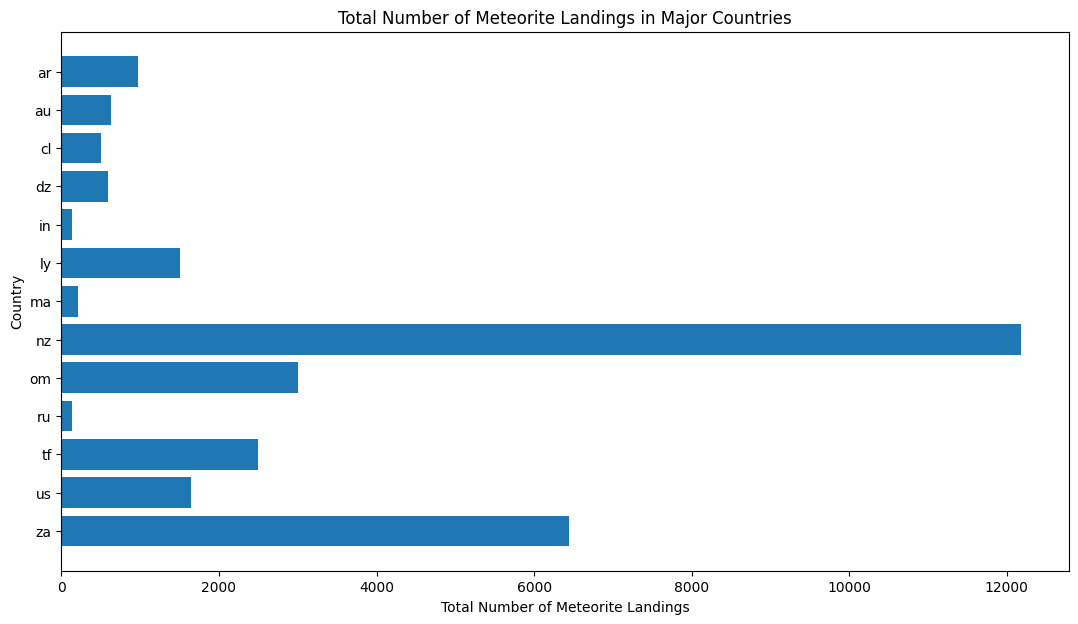

In [31]:
# Assuming major_country_geo_count_df is your DataFrame with country and corresponding counts
x_axis = major_country_geo_count_df["name"]  # Use country names as y-axis (horizontal axis)
y_axis = major_country_geo_count_df["Country"]  # Use counts as x-axis (vertical axis)

plt.figure(figsize=(13, 7))
plt.barh(y_axis, x_axis)  # Use barh for horizontal bar chart
plt.title("Total Number of Meteorite Landings in Major Countries")
plt.xlabel("Total Number of Meteorite Landings")
plt.ylabel("Country")
plt.gca().invert_yaxis()  # Invert y-axis to display countries from top to bottom
plt.savefig("Meteorites_Countries.png")  # Save the plot as an image
plt.show()  # Display the plot

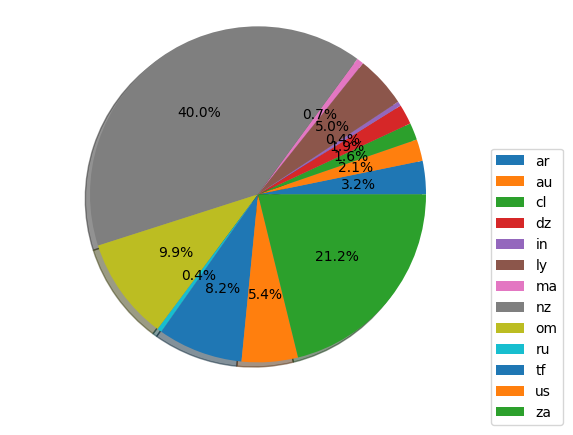

In [33]:
# Pie Chart
# Create a pie chart
pie = plt.pie(major_country_geo_count_df["name"], shadow=True, autopct='%1.1f%%')
#shadow=True adds a shadow effect to the pie chart for a 3D appearance.
#autopct='%1.1f%%' specifies the format for displaying the percentage values inside each wedge of the pie chart (1.1f means one decimal place).
# Set the aspect ratio to be equal, so the pie chart is drawn as a circle
plt.axis("equal")
# Set the legend for the pie chart using country names
labels=major_country_geo_count_df["Country"]
plt.legend(pie[0],labels, bbox_to_anchor=(1,0), loc="lower right", 
                          bbox_transform=plt.gcf().transFigure)
# loc="lower right" specifies the location of the legend relative to the anchor point.
# bbox_transform=plt.gcf().transFigure transforms the legend's bounding box relative to the figure.
plt.show()

### Find Out Top 10 Largest Meteorites on Earth

In [34]:
sort_mass_df = clean_geocode_df.sort_values(by="mass (g)", ascending=False)
sort_mass_df.head(10)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,City,Country
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,1920.0,-19.58333,17.91667,"(-19.58333, 17.91667)",grootfontein,na
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,1818.0,76.13333,-64.93333,"(76.13333, -64.93333)",iqaluit,ca
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575.0,-27.46667,-60.58333,"(-27.46667, -60.58333)",villa angela,ar
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,1891.0,35.05000,-111.03333,"(35.05, -111.03333)",winslow,us
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,1898.0,47.00000,88.00000,"(47.0, 88.0)",altay,cn
12613,Gibeon,10912,Valid,"Iron, IVA",26000000.0,Found,1836.0,-25.50000,18.00000,"(-25.5, 18.0)",mariental,na
5468,Chupaderos,5363,Valid,"Iron, IIIAB",24300000.0,Found,1852.0,27.00000,-105.10000,"(27.0, -105.1)",jose mariano jimenez,mx
26297,Mundrabilla,16852,Valid,"Iron, IAB-ung",24000000.0,Found,1911.0,-30.78333,127.55000,"(-30.78333, 127.55)",port lincoln,au
920,Sikhote-Alin,23593,Valid,"Iron, IIAB",23000000.0,Fell,1947.0,46.16000,134.65333,"(46.16, 134.65333)",luchegorsk,ru
5016,Bacubirito,4919,Valid,"Iron, ungrouped",22000000.0,Found,1863.0,26.20000,-107.83333,"(26.2, -107.83333)",sinaloa de leyva,mx


In [35]:
import gmaps

# Google developer API key
from config import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)

In [43]:
from collections.abc import Iterable

# Assuming sort_mass_df[["reclat", "reclong"]] returns a DataFrame with coordinates
locations = sort_mass_df[["reclat", "reclong"]].head(10)

# Check if locations is iterable using isinstance
if isinstance(locations, Iterable):
    # If locations is iterable, create marker layer and add to the map figure
    markers = gmaps.marker_layer(locations.values.tolist())  # Convert DataFrame to list of coordinates
    fig.add_layer(markers)
    fig
else:
    print("Locations is not iterable")

AttributeError: module 'collections' has no attribute 'Iterable'

In [61]:
# Store latitude and longitude in locations
locations = sort_mass_df[["reclat", "reclong"]].head(10)
# Plot as a Terrain map
fig = gmaps.figure(zoom_level = 2, center = [0,180])

In [62]:
# Assign the marker layer to a variable
markers = gmaps.marker_layer(locations)
# Add the layer to the map
fig.add_layer(markers)
fig

AttributeError: module 'collections' has no attribute 'Iterable'

In [54]:
from IPython.display import Image
Image("Biggest_Mass10.png")

FileNotFoundError: No such file or directory: 'Biggest_Mass10.png'

FileNotFoundError: No such file or directory: 'Biggest_Mass10.png'

<IPython.core.display.Image object>

In [38]:
# Find Out Top 10 Earliest Found Meteorites Landings on Earth
sort_year_df = clean_geocode_df.sort_values(by="year", ascending=True)
sort_year_df.head(10)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,City,Country
704,Nogata,16988,Valid,L6,472.0,Fell,860.0,33.72500,130.75000,"(33.725, 130.75)",nogata,jp
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399.0,50.18333,12.73333,"(50.18333, 12.73333)",chodov,cz
856,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,1490.0,45.48333,9.51667,"(45.48333, 9.51667)",rivolta d'adda,it
283,Ensisheim,10039,Valid,LL6,127000.0,Fell,1491.0,47.86667,7.35000,"(47.86667, 7.35)",ensisheim,fr
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575.0,-27.46667,-60.58333,"(-27.46667, -60.58333)",villa angela,ar
174,Castrovillari,5295,Valid,Stone-uncl,15000.0,Fell,1583.0,39.80000,16.20000,"(39.8, 16.2)",castrovillari,it
26174,Morito,16745,Valid,"Iron, IIIAB",10100000.0,Found,1600.0,27.05000,-105.43333,"(27.05, -105.43333)",parral,mx
410,Jalandhar,12069,Valid,Iron,1967.0,Fell,1621.0,31.00000,75.00000,"(31.0, 75.0)",zira,in
960,Stretchleigh,23732,Valid,Stone-uncl,10400.0,Fell,1623.0,50.38333,-3.95000,"(50.38333, -3.95)",ivybridge,gb
369,Hatford,11855,Valid,Stone-uncl,29000.0,Fell,1628.0,51.65000,-1.51667,"(51.65, -1.51667)",faringdon,gb


In [41]:
# Store latitude and longitude in locations
locations = sort_year_df[["reclat", "reclong"]].head(10)
# Plot as a Terrain map
fig_2 = gmaps.figure(zoom_level = 2, center = [0,180])

In [42]:
# Assign the marker layer to a variable
markers = gmaps.marker_layer(locations)
# Add the layer to the map
fig_2.add_layer(markers)
fig_2

AttributeError: module 'collections' has no attribute 'Iterable'

In [14]:
# Set up bins for Years
#year_bins = [0, 1899.999, 1999.999, 2020]
#group_names = ["<1900", "1900-2000", "2000-2020"]

In [21]:
# Add a new column named Year Ramge amd binnning based off the range
#clean_meteorite_landings_df["Year Range"] = pd.cut(clean_meteorite_landings_df["year"], year_bins, labels=group_names)
#del clean_meteorite_landings_df["year"]
#clean_meteorite_landings_df